# Analisis Data Listings

In [ ]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import unicodedata
from collections import Counter

# Exploracion del Conjunto de Datos

## Exploracion General de los datos

Leemos el csv e imprimimos el archivo para validar que si este correcto el dataframe

In [4]:
#Lecura del archivo CSV
df = pd.read_csv('../data/raw/listings.csv', sep = ',', encoding = 'utf-8')
#Imrpimir las primeras filas del DataFrame
print(df.head())

                        _id     id                         listing_url  \
0  68e868bb1d1fc3fd4a01f6cb  35797  https://www.airbnb.com/rooms/35797   
1  68e868bb1d1fc3fd4a01f6cc  44616  https://www.airbnb.com/rooms/44616   
2  68e868bb1d1fc3fd4a01f6cd  56074  https://www.airbnb.com/rooms/56074   
3  68e868bb1d1fc3fd4a01f6ce  67703  https://www.airbnb.com/rooms/67703   
4  68e868bb1d1fc3fd4a01f6cf  70644  https://www.airbnb.com/rooms/70644   

        scrape_id last_scraped       source  \
0  20250625031918   2025-06-26  city scrape   
1  20250625031918   2025-07-01  city scrape   
2  20250625031918   2025-07-01  city scrape   
3  20250625031918   2025-07-01  city scrape   
4  20250625031918   2025-07-01  city scrape   

                                               name  \
0                                       Villa Dante   
1                                      Condesa Haus   
2              Great space in historical San Rafael   
3                 2 bedroom apt. deco bldg, Condesa 

El tamaño de del dataframe y las columnas que tiene este

In [5]:
#Cantidad de columnas y filas
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 26401 filas y 77 columnas.


Un vistado general de las columnas del dataframe 

In [6]:
#Estructura del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   _id                                           26401 non-null  object 
 1   id                                            26401 non-null  int64  
 2   listing_url                                   26401 non-null  object 
 3   scrape_id                                     26401 non-null  int64  
 4   last_scraped                                  26401 non-null  object 
 5   source                                        26401 non-null  object 
 6   name                                          26401 non-null  object 
 7   description                                   25633 non-null  object 
 8   neighborhood_overview                         13970 non-null  object 
 9   picture_url                                   26401 non-null 

## Análisis de las columnas tipo *object* (no numéricas)

Se realizó un análisis detallado de las columnas categóricas y de texto con el propósito de comprender su estructura y definir las transformaciones necesarias para su posterior procesamiento; a continuación, se presentan los hallazgos más relevantes por columna:

- **Columnas de fecha:** presentan el formato estándar `aaaa-mm-dd`, por lo que **no requieren transformaciones adicionales** y pueden emplearse directamente en los análisis temporales o de series de tiempo.  

- **`host_response_rate` y `host_acceptance_rate`:** ambas variables contienen el carácter `%`, por lo que es necesario **eliminar este símbolo y convertir sus valores a tipo numérico**; esto permitirá calcular promedios, distribuciones y realizar análisis estadísticos más precisos.  

- **`host_response_time`:** se identificaron valores únicos como `within an hour`, `within a few hours`, `within a day` y `a few days or more`; por lo tanto, se decidió **agruparlos en tres categorías principales**:  
  - *Rápido:* incluye “within an hour” y “within a few hours”.  
  - *Moderado:* corresponde a “within a day”.  
  - *Demorado:* agrupa “a few days or more”  
  Esta categorización facilitará el análisis del comportamiento de respuesta de los anfitriones.  

- **`host_verifications`:** actualmente se presenta como una lista que agrupa los distintos métodos de verificación del anfitrión; para su análisis, se generarán **columnas binarias** que indiquen la presencia o ausencia de cada método, esto ya que son solo 3 metodos disponibles [email, phone y work_email].  

- **`amenities`:** también se encuentra en formato de lista, pero con una cantidad considerable de elementos y variaciones; se realizará un **análisis más profundo** para identificar las **10 categorías más frecuentes o relevantes** (por ejemplo, Wi-Fi, aire acondicionado, cocina, estacionamiento, entre otros), y se crearán columnas binarias que indiquen si cada alojamiento ofrece o no dichos servicios.  

- **`price`:** contiene el símbolo `$` y, en algunos casos, comas (`,`) como separadores de miles; se eliminarán estos caracteres y los valores serán **convertidos a tipo `float`**, garantizando su correcta interpretación como variable numérica para análisis comparativos y de tendencia.  

- **`neighbourhood`:** presenta inconsistencias en los nombres debido a diferencias en mayúsculas, acentos o grafías; se procederá a **normalizar los valores a minúsculas y sin tildes**, con el fin de unificar la información y evitar duplicidades durante el análisis geográfico.  

- **`bathrooms_text` y `bathrooms`:** inicialmente se evaluó normalizar la columna textual (`bathrooms_text`) a números enteros, sin embargo, existe una columna numérica (`bathrooms`) más representativa; por ello, se optó por **usar y estandarizar esta última**, redondeando los valores a enteros cuando sea necesario. Así, por ejemplo, un registro con “5.5 baños” será interpretado como **6 baños**, considerando que equivale a cinco completos y uno medio (solo inodoro y lavamanos) y esto se ve detallado en la original de `bathrooms_text`.  

En conjunto, estas transformaciones permitirán **homogeneizar los datos categóricos**, mejorar su legibilidad y preparar el conjunto para un análisis exploratorio más consistente y preciso.  




In [7]:
#Columnas tipo objectobj_cols = df.select_dtypes(include='object')
# Filtramos solo columnas tipo object
obj_cols = df.select_dtypes(include='object')
# Mostramos todas las columnas sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
obj_cols.head(10)

,_id,listing_url,last_scraped,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,host_neighbourhood,first_review,last_review
0,68e868bb1d1fc3fd4a01f6cb,https://www.airbnb.com/rooms/35797,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,False,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,"['email', 'phone', 'work_email']",True,True,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,Entire villa,Entire home/apt,1 bath,"['Kitchen', 'Resort access', 'Hot water', 'Cou...","$3,799.00",True,2025-06-26,NaN,NaN,NaN
1,68e868bb1d1fc3fd4a01f6cc,https://www.airbnb.com/rooms/44616,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,100%,91%,False,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,"['email', 'phone', 'work_email']",True,True,NaN,Cuauhtémoc,Entire home,Entire home/apt,5.5 baths,"['Free street parking', 'Free parking on premi...","$18,000.00",True,2025-07-01,Condesa,2011-11-09,2025-01-01
2,68e868bb1d1fc3fd4a01f6cd,https://www.airbnb.com/rooms/56074,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,100%,100%,False,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,"['email', 'phone']",True,True,"Mexico City, DF, Mexico",Cuauhtémoc,Entire condo,Entire home/apt,1 bath,"['Dining table', 'Hot water', 'Hangers', 'Esse...",$585.00,True,2025-07-01,San Rafael,2011-04-02,2025-02-27
3,68e868bb1d1fc3fd4a01f6ce,https://www.airbnb.com/rooms/67703,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within a few hours,100%,47%,False,https://a0.muscache.com/im/users/334451/profil...,https://a0.muscache.com/im/users/334451/profil...,"['email', 'phone']",True,True,NaN,Cuauhtémoc,Entire rental unit,Entire home/apt,1 bath,"['Hot water', 'TV with standard cable', 'Hange...","$1,696.00",True,2025-07-01,Hipódromo,2011-11-17,2024-10-30
4,68e868bb1d1fc3fd4a01f6cf,https://www.airbnb.com/rooms/70644,2025-07-01,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a few hours,100%,85%,True,https://a0.muscache.com/im/users/212109/profil...,https://a0.muscache.com/im/users/212109/profil...,"['email', 'phone', 'work_email']",True,True,"Mexico City, Federal District, Mexico",Coyoacán,Entire rental unit,En

In [ ]:
#Valores únicos en la columna 'host_verifications'
df['host_verifications'].unique()

array(["['email', 'phone', 'work_email']", "['email', 'phone']",
       "['phone']", nan, "['phone', 'work_email']", "['email']", '[]',
       "['email', 'work_email']", "['work_email']"], dtype=object)

In [ ]:
#Valores únicos en la columna 'host_response_time'
df['host_response_time'].unique()

array([nan, 'within an hour', 'within a few hours', 'a few days or more',
       'within a day'], dtype=object)

In [ ]:
#Valores únicos en la columna 'neighbourhood'
df['neighbourhood'].unique()

array(['Mexico City, D.f., Mexico', nan, 'Mexico City, DF, Mexico',
       'Mexico City, Federal District, Mexico',
       'Colonia Juárez, Ciudad de México, Mexico', 'Mexico City, Mexico',
       'Mexico City, CDMX, Mexico', 'Mexico , Cuauhtemoc, Mexico',
       'Pensador Mexicano, Ciudad de México, Mexico',
       'México, D.F., Mexico',
       'Col. Anáhuac I, Miguel Hidalgo , Distrito Federal, Mexico',
       'Mexico City, D.F., Mexico', 'Coyacán, Federal District, Mexico',
       'Mexico City    COYOACAN, Federal District, Mexico',
       'Mexico City, Alcaldia Coyoacan, Mexico', 'Mexico',
       'Mexico City, Coyoacán, Mexico',
       'Mexico City, State of Mexico, Mexico',
       'Coyoacan , México City, Mexico', 'Mexico, Df, Mexico',
       'México DF, Ciudad de México, Mexico',
       'Huixquilucan, State of Mexico, Mexico',
       'Coyoacán, Ciudad de México, Mexico',
       'México, Distrito Federal, Mexico',
       'Centro, Ciudad de México, Mexico', 'Mexico City, Polanco, 

In [ ]:
#Valores únicos en la columna 'bathrooms_text'
df['bathrooms_text'].unique()

array(['1 bath', '5.5 baths', '1 private bath', '5 baths', '1.5 baths',
       '1 shared bath', '2 shared baths', '2 baths', '4.5 baths',
       '1.5 shared baths', '6 baths', '3.5 baths', '3 baths', '2.5 baths',
       'Half-bath', '2.5 shared baths', '3 shared baths',
       '4 shared baths', '10 baths', nan, '16 baths', '4 baths',
       '0 baths', '7 baths', '20 baths', '4.5 shared baths',
       '0 shared baths', '8 shared baths', '49 baths', '10 shared baths',
       '3.5 shared baths', '46 baths', 'Shared half-bath', '8.5 baths',
       '9 baths', '7.5 baths', '8 baths', '6 shared baths', '12 baths',
       '6.5 baths', '5 shared baths', '15 baths', '13 baths',
       '13 shared baths', 'Private half-bath', '17 baths',
       '12 shared baths', '14 baths', '11.5 shared baths', '14.5 baths',
       '12.5 baths', '11.5 baths', '11 baths', '11 shared baths',
       '10.5 baths', '21 baths', '5.5 shared baths', '14 shared baths',
       '14.5 shared baths', '6.5 shared baths'], dtyp

### Analisis de las amenities

Para la columna **`amenities`**, se identificó un total de **6.513 registros** que contienen listas de servicios y características disponibles en cada alojamiento. Con el fin de realizar un análisis más detallado, se determinó **extraer los 10 servicios más utilizados** en general dentro de los anuncios de Airbnb y, a partir de ellos, **crear columnas binarias** que indiquen si cada alojamiento **cuenta o no con dichos servicios**.  

Es importante resaltar que la columna original **`amenities` no será eliminada**, ya que puede ser útil para futuros análisis más profundos o específicos. Además, se agregará una nueva columna que **indique la cantidad total de servicios** que ofrece cada alojamiento, permitiendo así evaluar de manera cuantitativa el nivel de equipamiento o comodidad de las propiedades.  


In [36]:

# Asegurar que la columna amenities sea lista
df['amenities'] = df['amenities'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Reemplazar nulos o valores incorrectos
df['amenities'] = df['amenities'].apply(lambda x: x if isinstance(x, list) else [])

# Aplanar todas las listas y limpiar el texto
amenities_flat = [a.strip().lower() for sublist in df['amenities'] for a in sublist]

# Obtener los únicos
amenities_unicos = sorted(set(amenities_flat))

print(f"Total de amenities únicos encontrados: {len(amenities_unicos)}")


Total de amenities únicos encontrados: 6513


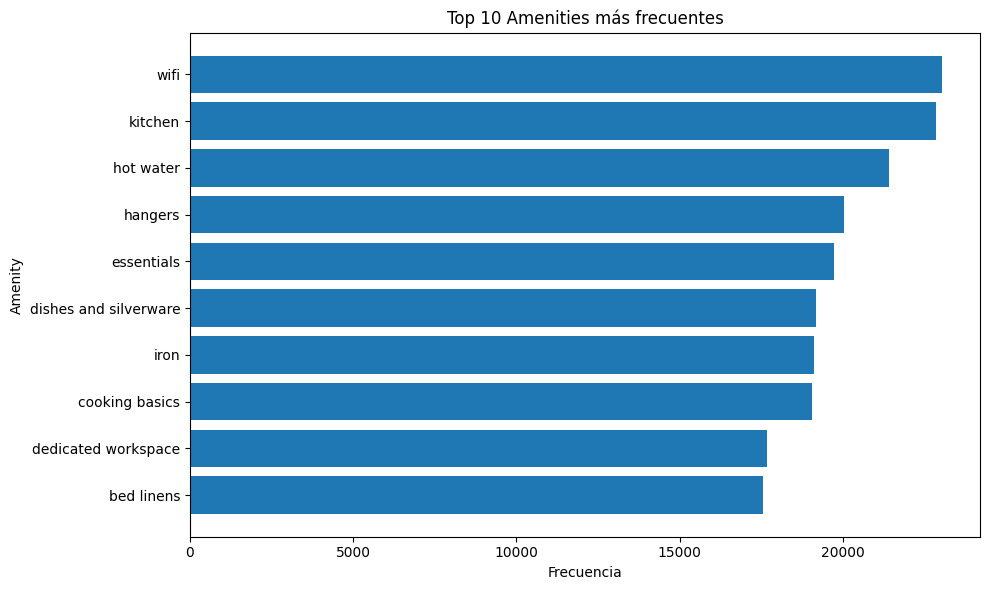

In [ ]:
# Copia del dataframe para seguridad
df_amenities = df.copy()

# Asegurar que la columna 'amenities' sea una lista (algunos vienen como string tipo "[...]" )
df_amenities['amenities'] = df_amenities['amenities'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Reemplazar nulos por listas vacías
df_amenities['amenities'] = df_amenities['amenities'].apply(lambda x: x if isinstance(x, list) else [])

# Aplanar la lista de listas para contar frecuencias
amenities_flat = [amenity.strip().lower() for sublist in df_amenities['amenities'] for amenity in sublist]

# Contar ocurrencias
contador = Counter(amenities_flat)

# Crear un DataFrame con los resultados
df_top_amenities = pd.DataFrame(contador.most_common(10), columns=['Amenity', 'Frecuencia'])

# --- Gráfico de barras ---
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(df_top_amenities['Amenity'][::-1], df_top_amenities['Frecuencia'][::-1])
plt.title("Top 10 Amenities más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Amenity")
plt.tight_layout()
plt.show()


## Análisis de las columnas tipo *number* (numéricas)

Se aplicó el mismo enfoque de análisis utilizado en las columnas no numéricas, pero orientado a las variables de tipo numérico; el objetivo fue evaluar su consistencia, rango de valores y necesidad de transformación o limpieza.

En general, **no se identificaron discrepancias significativas** en los datos numéricos, ya que los valores presentan rangos coherentes y no se detectaron errores de formato ni unidades inconsistentes.  

Unicamente se decidió **normalizar la columna de baños a valores enteros**, tomando como referencia la información complementaria del texto que indica cuántos son completos y cuántos son medios; de esta forma, se garantiza una representación numérica uniforme que facilite el análisis comparativo entre alojamientos.  


In [ ]:
# Filtrar columnas numéricas
df_num = df.select_dtypes(include=['number'])
pd.set_option('display.max_columns', None)  
display(df_num.head(10))


,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,35797,20250625031918,153786,1.0,1.0,19.38283,-99.27178,2,1.0,1.0,1.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,29,59,89,364,0,0,0,188,0,0,0.0,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44616,20250625031918,196253,13.0,13.0,19.41162,-99.17794,14,5.5,5.0,8.0,1,180,1.0,1.0,180.0,180.0,1.0,180.0,29,59,89,360,65,1,0,179,0,6,108000.0,9,4,2,0,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.39
2,56074,20250625031918,265650,1.0,5.0,19.43977,-99.15605,2,1.0,1.0,1.0,15,250,15.0,15.0,250.0,250.0,15.0,250.0,3,33,63,338,84,1,0,157,0,30,17550.0,1,1,0,0,4.87,4.95,4.88,4.98,4.94,4.76,4.79,0.48
3,67703,20250625031918,334451,3.0,4.0,19.41152,-99.16857,4,1.0,2.0,2.0,2,30,2.0,2.0,30.0,30.0,2.0,30.0,3,4,32,267,50,1,0,97,4,6,10176.0,2,2,0,0,4.90,4.82,4.76,4.94,4.92,4.98,4.92,0.30
4,70644,20250625031918,212109,3.0,4.0,19.35448,-99.16217,2,1.0,1.0,1.0,3,180,3.0,4.0,180.0,180.0,3.4,180.0,10,25,25,211,132,8,0,98,9,48,48192.0,3,2,1,0,4.92,4.91,4.96,4.96,4.98,4.96,4.92,0.81
5,131610,20250625031918,647454,3.0,4.0,19.35416,-99.16488,2,NaN,2.0,NaN,1,730,1.0,1.0,730.0,730.0,1.0,730.0,0,0,0,0,0,0,0,0,0,0,NaN,3,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,165772,20250625031918,790208,5.0,6.0,19.40826,-99.18659,16,5.0,5.0,10.0,2,365,2.0,2.0,365.0,365.0,2.0,365.0,2,11,28,177,383,31,0,52,38,186,757206.0,5,5,0,0,4.88,4.91,4.83,4.91,4.88,4.75,4.90,2.26
7,171109,20250625031918,816295,3.0,3.0,19.39675,-99.17581,2,1.0,1.0,1.0,4,90,4.0,4.0,90.0,90.0,4.0,90.0,20,50,80,355,117,10,3,173,7,80,25200.0,2,0,2,0,4.84,4.86,4.61,4.98,4.95,4.96,4.82,0.85
8,180808,20250625031918,36836,2.0,6.0,19.42390,-99.16890,2,1.5,1.0,1.0,3,365,3.0,3.0,1125.0,1125.0,3.0,1125.0,20,50,80,355,60,9,0,178,5,54,76248.0,1,1,0,0,4.82,4.90,4.77,4.92,4.90,4.90,4.75,0.37
9,187030,20250625031918,899360,6.0,8.0,19.41057,-99.17730,4,NaN,1.0,NaN,4,365,4.0,4.0,365.0,365.0,4.0,365.0,0,0,0,0,103,0,0,0,0,0,NaN,6,6,0,0,4.57,4.66,4.66,4.83,4.88,4.92,4.50,0.62


## Análisis de valores nulos

Se realizó una verificación detallada del porcentaje de valores nulos presentes en cada columna del conjunto de datos, con el objetivo de determinar su impacto y definir estrategias de limpieza o eliminación.  

Durante este análisis se observó que **varias columnas presentan más del 45% de valores faltantes**, por lo que se consideró apropiado **eliminarlas**, ya que aportan poca información útil para el análisis exploratorio o el modelado posterior; entre ellas se destacan las columnas `host_about`, `neighbourhood`, `neighborhood_overview` y `host_neighbourhood`, que contienen principalmente **información adicional o descriptiva sobre el anfitrión**, sin relevancia directa para el análisis cuantitativo. Además, dado que el identificador del host (`host_id`) ya se conserva, la eliminación de estas variables no afecta la posibilidad de realizar agrupaciones o análisis relacionados con el anfitrión.  

Posteriormente, se **generó un mapa de calor** para visualizar la distribución de los valores nulos a lo largo del *DataFrame*; esta representación permitió **detectar patrones o correlaciones** entre columnas que presentan valores faltantes de manera simultánea. A partir de esta visualización, se identificaron **filas con una alta proporción de datos nulos**, por lo que se efectuó un análisis adicional para cuantificar los registros con más del 50%, 40% y 30% de columnas vacías.  

El resultado mostró que, si bien existen filas con más del 40% o 30% de valores nulos, estos casos corresponden principalmente a **anuncios (listings) que nunca han sido arrendados**, razón por la cual los campos relacionados con reseñas o comentarios aparecen vacíos; en consecuencia, se decidió **mantener estas filas**, ya que los valores nulos reflejan la **naturaleza del negocio** y no errores de captura o inconsistencias en los datos.  



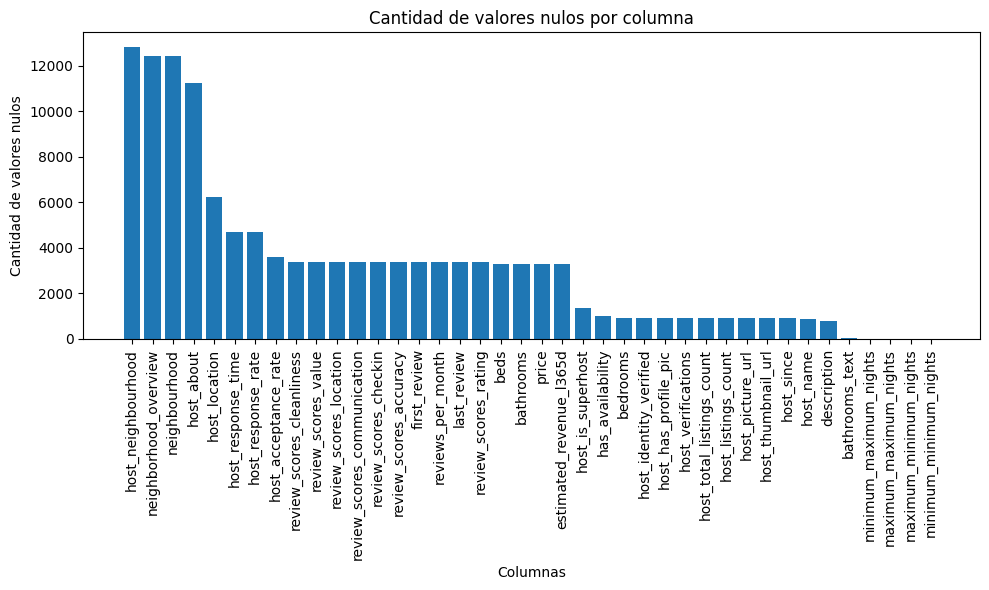

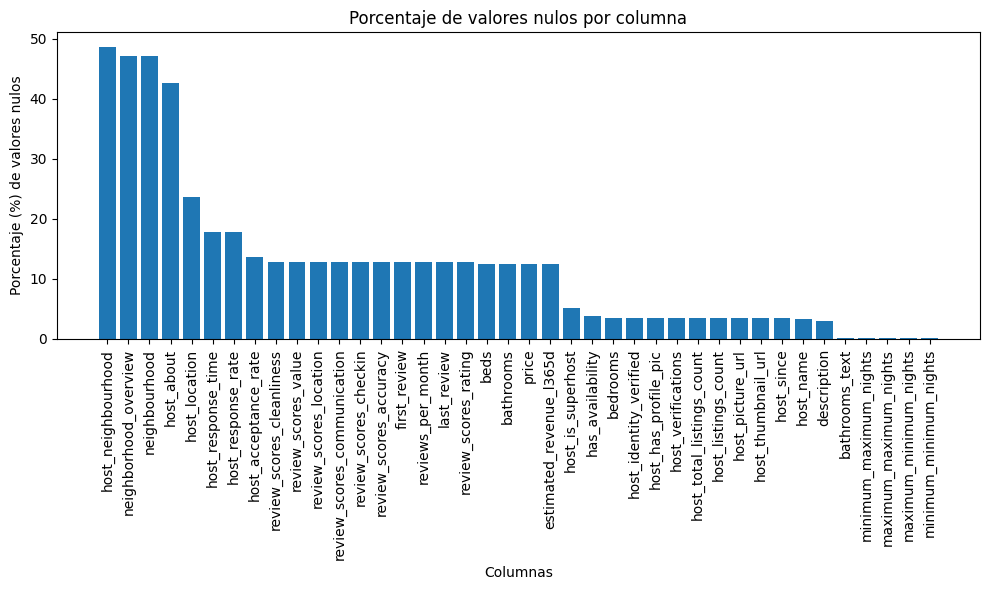

In [32]:
nulos = df.isnull().sum()
por_nulos = (df.isnull().mean() * 100).round(2)

# Crear tabla
tabla = pd.concat([nulos, por_nulos], axis=1, keys=['Nulos', '%'])

# Filtrar solo columnas con nulos
df_nulos = tabla[tabla['Nulos'] > 0].sort_values(by='Nulos', ascending=False)

# Verificar que haya columnas con nulos
if df_nulos.empty:
    print("✅ No hay columnas con valores nulos en el DataFrame.")
else:
    # Gráfico de cantidad de nulos
    plt.figure(figsize=(10, 6))
    plt.bar(df_nulos.index, df_nulos['Nulos'])
    plt.xticks(rotation=90)
    plt.title("Cantidad de valores nulos por columna")
    plt.xlabel("Columnas")
    plt.ylabel("Cantidad de valores nulos")
    plt.tight_layout()
    plt.show()

    # Gráfico de porcentaje de nulos
    plt.figure(figsize=(10, 6))
    plt.bar(df_nulos.index, df_nulos['%'])
    plt.xticks(rotation=90)
    plt.title("Porcentaje de valores nulos por columna")
    plt.xlabel("Columnas")
    plt.ylabel("Porcentaje (%) de valores nulos")
    plt.tight_layout()
    plt.show()


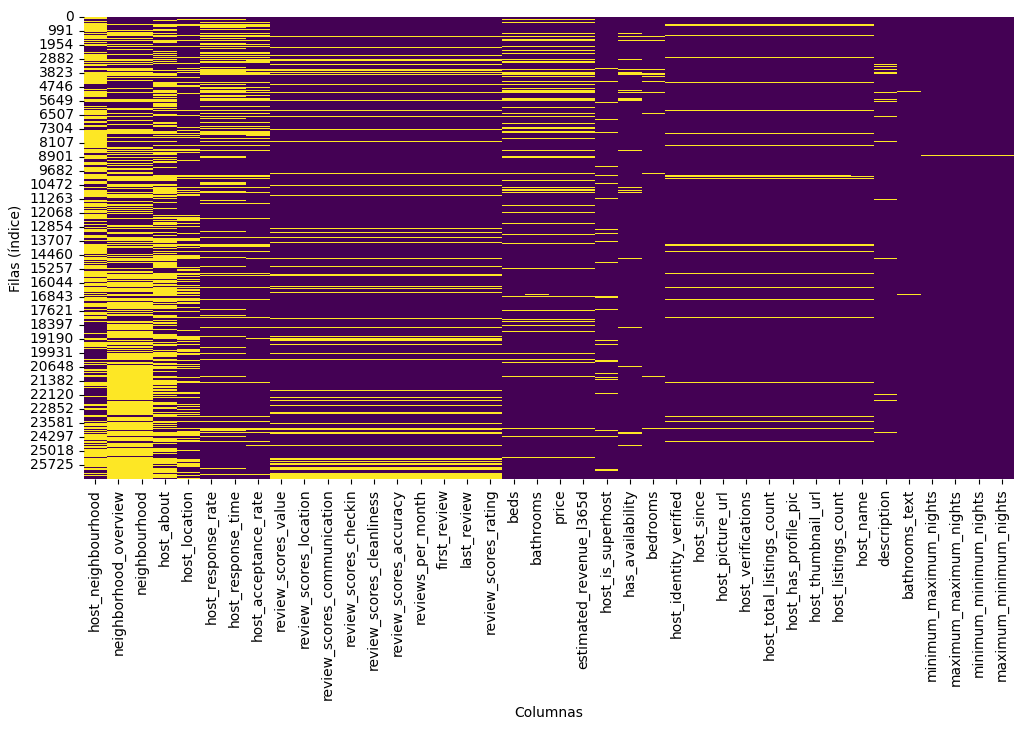

In [ ]:
# Mapa de calor de nulos
cols_con_nulos = df_nulos.copy()[df_nulos['Nulos'] >= 1].index.tolist()
df_cols_nulos = df[cols_con_nulos]
df_filas_nulas = df_cols_nulos[df_cols_nulos.isnull().any(axis=1)]
plt.figure(figsize=(12, 6))
sns.heatmap(df_filas_nulas.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Columnas')
plt.ylabel('Filas (índice)')
plt.show()

In [14]:
# Calcular el umbral 
umbral = 0.3 * df.shape[1]
filas_nulos = df[df.isnull().sum(axis=1) > umbral]
print(f"Número de filas con nulos : {filas_nulos.shape[0]}")
display(filas_nulos.head())


Número de filas con nulos : 168


,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_neighbourhood,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
28,68e868bb1d1fc3fd4a01f6e7,276504,https://www.airbnb.com/rooms/276504,20250625031918,2025-07-01,previous scrape,High End Condo with golf package,NaN,NaN,https://a0.muscache.com/pictures/2802432/4be14...,1444589,https://www.airbnb.com/users/show/1444589,Michael,2011-11-26,NaN,NaN,NaN,NaN,NaN,False,https://a0.muscache.com/im/users/1444589/profi...,https://a0.muscache.com/im/users/1444589/profi...,1.0,1.0,"['email', 'phone']",True,False,NaN,Iztacalco,19.38061,-99.12729,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,NaN,"['Free parking on premises', 'Washer', 'Dryer'...",NaN,7,365,7.0,7.0,365.0,365.0,7.0,365.0,NaN,0,0,0,0,2025-07-01,0,0,0,0,0,0,NaN,False,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
508,68e868bb1d1fc3fd4a01f8c7,8185711,https://www.airbnb.com/rooms/8185711,20250625031918,2025-07-01,previous scrape,Habitación en la Col. San Rafael,Looking for a quiet place to live? This is you...,NaN,https://a0.muscache.com/pictures/104206638/426...,43180770,https://www.airbnb.com/users/show/43180770,Jose Luis,2015-09-02,NaN,NaN,NaN,NaN,NaN,False,https://a0.muscache.com/im/users/43180770/prof...,https://a0.muscache.com/im/users/43180770/prof...,1.0,1.0,"['email', 'phone']",True,False,NaN,Cuauhtémoc,19.43919,-99.15698,Private room in rental unit,Private room,1,NaN,2 baths,NaN,NaN,"['Free parking on premises', 'Washer', 'Dryer'...",NaN,1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,0,0,0,0,2025-07-01,0,0,0,0,0,0,NaN,False,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
534,68e868bb1d1fc3fd4a01f8e1,8519696,https://www.airbnb.com/rooms/8519696,20250625031918,2025-07-01,previous scrape,Casa de los cactus,The house is spacious and I have taken care of...,NaN,https://a0.muscache.com/pictures/b44293bf-228d...,44860149,https://www.airbnb.com/users/show/44860149,Verónica,2015-09-22,NaN,NaN,NaN,NaN,NaN,False,https://a0.muscache.com/im/pictures/user/25e2b...,https://a0.muscache.com/im/pictures/user/25e2b...,1.0,2.0,"['email', 'phone']",True,False,NaN,Coyoacán,19.34157,-99.16034,Private room in rental unit,Private room,2,NaN,1 private bath,NaN,NaN,"['Heating', 'Washer', 'Essentials', 'Lock on b...",NaN,1,7,1.0,1.0,7.0,7.0,1.0,7.0,NaN,0,0,0,0,2025-07-01,0,0,0,0,0,0,NaN,False,1,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
819,68e868bb1d1fc3fd4a01f9fe,11554037,https://www.airbnb.com/rooms/11554037,20250625031918,2025-07-01,previous scrape,Rento recámara con cama matrimonial,In a quiet area. Inside a house with two peopl...,NaN,https://a0.muscache.com/pictures/e1f4c429-42ba...,61005374,https://www.airbnb.com/users/show/61005374,Eugenia,2016-02-29,NaN,NaN,NaN,NaN,NaN,False,https://a0.muscache.com

## Análisis general con `describe()`

Se llevó a cabo un análisis exploratorio general mediante el método `describe()`, con el propósito de revisar las principales estadísticas descriptivas de las variables numéricas y detectar posibles inconsistencias, valores atípicos o columnas con datos uniformes en todo el *DataFrame*.  

A partir de este análisis se concluye que **no existen variables con valores constantes o completamente repetidos**, ni se evidencian **discrepancias significativas** que sugieran errores en la captura o transformación de los datos; en términos generales, el conjunto se muestra **coherente y consistente** en sus principales características.  

Por ejemplo, se observa una **amplia variabilidad en la columna `minimum_nights`**, donde el valor mínimo es `0` y el máximo alcanza `1000`; aunque esta diferencia pueda parecer extrema, se considera **natural dentro de la lógica del negocio**, ya que existen anfitriones que permiten estancias de una sola noche, mientras que otros establecen períodos mínimos mucho más largos, especialmente en propiedades de alquiler prolongado.  



In [ ]:
# Estadísticas descriptivas de columnas numéricas
df_num = df.select_dtypes(include=['number'])
stats = df_num.describe().T
display(stats.round(2))

,count,mean,std,min,25%,50%,75%,max
id,26401.0,6.488522e+17,5.483558e+17,3.579700e+04,4.255992e+07,7.821415e+17,1.148084e+18,1.450438e+18
scrape_id,26401.0,2.025063e+13,0.000000e+00,2.025063e+13,2.025063e+13,2.025063e+13,2.025063e+13,2.025063e+13
host_id,26401.0,2.354112e+08,2.005844e+08,7.365000e+03,5.436477e+07,1.705833e+08,4.161560e+08,7.031773e+08
host_listings_count,25487.0,2.447000e+01,8.239000e+01,1.000000e+00,1.000000e+00,4.000000e+00,1.400000e+01,8.960000e+02
host_total_listings_count,25487.0,3.319000e+01,1.155700e+02,1.000000e+00,2.000000e+00,5.000000e+00,1.700000e+01,9.460000e+02
latitude,26401.0,1.941000e+01,4.000000e-02,1.918000e+01,1.939000e+01,1.942000e+01,1.943000e+01,1.956000e+01
longitude,26401.0,-9.917000e+01,3.000000e-02,-9.934000e+01,-9.918000e+01,-9.917000e+01,-9.915000e+01,-9.896000e+01
accommodates,26401.0,3.330000e+00,2.340000e+00,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00,1.600000e+01
bathrooms,23120.0,1.450000e+00,1.030000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,4.900000e+01
bedrooms,25477.0,1.560000e+00,1.270000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+01


## Análisis del histograma

Se generaron histogramas para las variables numéricas con el objetivo de **visualizar la distribución de los datos** y detectar patrones generales en su comportamiento

En términos generales, **no se observa una disparejidad significativa en las distribuciones**, aunque algunas variables presentan ligeras concentraciones en los extremos. Por ejemplo, en la columna `availability` y sus semejantes se evidencian **tendencias marcadas en los valores mínimos y máximos**, lo cual resulta natural considerando que algunos alojamientos se encuentran disponibles durante casi todo el año, mientras que otros apenas se ofrecen por períodos cortos.  

Asimismo, en columnas como **número de listings por host**, **cantidad de camas** y **número de baños** se aprecian ciertos valores que podrían considerarse **atípicos**; sin embargo, estos casos se analizarán con mayor detalle en la siguiente etapa, mediante el **diagrama de caja (boxplot)**, para determinar si efectivamente representan outliers o si corresponden a variaciones propias de la naturaleza del negocio.  



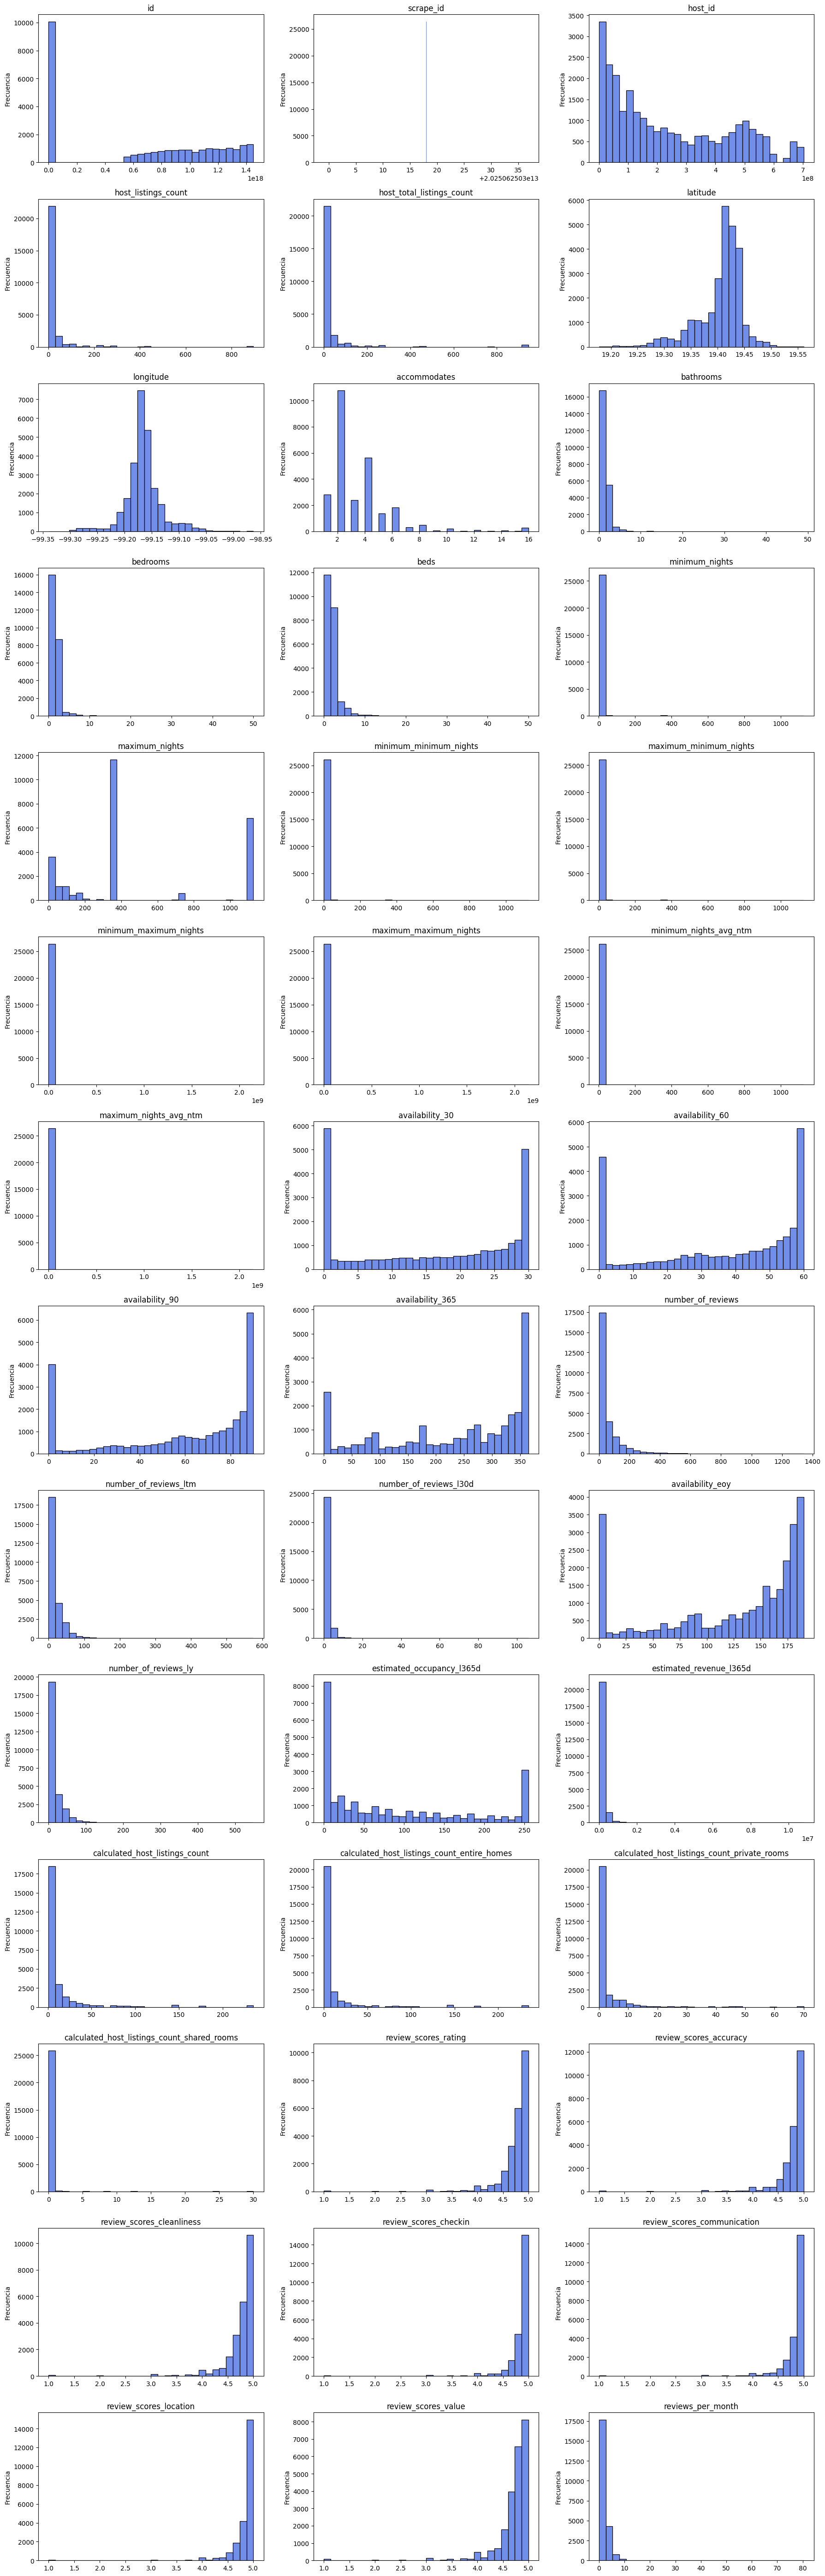

In [ ]:
# Histogramas de columnas numéricas
n_cols = 3
n_rows = int((len(df_num.columns) + n_cols - 1) / n_cols)

plt.figure(figsize=(n_cols * 6, n_rows * 4))
for i, col in enumerate(df_num.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df_num[col].dropna(), kde=False, bins=30, color='royalblue')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


## Análisis de valores atípicos (*Boxplots*)

Se generaron diagramas de caja (*boxplots*) para todas las variables numéricas con el propósito de **identificar valores atípicos** y analizar la **dispersión general de los datos**. Este procedimiento permite detectar registros extremos que podrían alterar la interpretación estadística o influir en el comportamiento de los modelos posteriores.  

Durante el análisis se observó que, en términos generales, las variables presentan **distribuciones coherentes y dentro de rangos esperados**. Sin embargo, en columnas como **`bathrooms`**, **`bedrooms`** y **`beds`** se identificaron valores superiores a 15, los cuales resultan **poco creíbles o inconsistentes** con el contexto del conjunto de datos. Por esta razón, estos registros fueron **eliminados**, ya que podrían distorsionar el análisis y generar conclusiones poco representativas del comportamiento real.  

Por otro lado, en la columna **`host_listings_count`** se detectaron casos con más de **200 propiedades por anfitrión**; aunque este valor pueda parecer extremo, se decidió **mantener estos registros**, ya que pueden corresponder a **anfitriones o empresas con múltiples alojamientos activos**, algo perfectamente posible dentro del modelo de negocio.  

En cuanto a las variables relacionadas con la **duración de las estancias**, como `minimum_nights` y `maximum_nights`, también se identificaron valores considerados atípicos; sin embargo, se interpretan como **naturales dentro de la lógica del negocio**, ya que existen alojamientos que se ofrecen para estancias muy cortas (una o dos noches) y otros orientados a alquileres prolongados (mensuales o incluso anuales).  

De forma similar, en las variables asociadas a **reseñas** se observaron dos comportamientos opuestos:  
- Por un lado, existen listados con más de **1200 reseñas**, probablemente asociados a **propiedades antiguas o muy populares**, por lo que se decidió mantenerlos.  
- Por otro lado, se presentan registros con **muy pocas reseñas o ninguna**, los cuales también se consideran **válidos**, ya que pueden corresponder a alojamientos nuevos o con baja demanda.  

En conclusión, salvo por los valores extremos eliminados en las variables de cantidad de habitaciones y camas, el resto de los datos atípicos se consideran **consistentes con la naturaleza del negocio** y se mantienen en el conjunto para no perder información relevante del comportamiento real del mercado.  




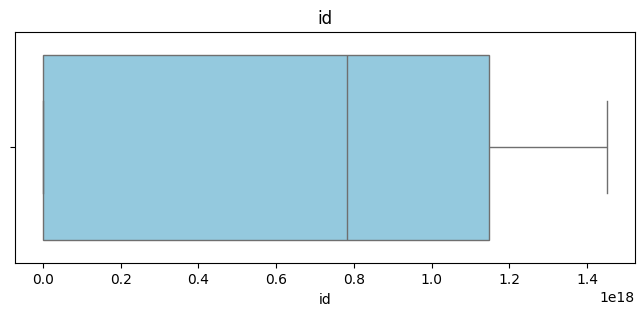

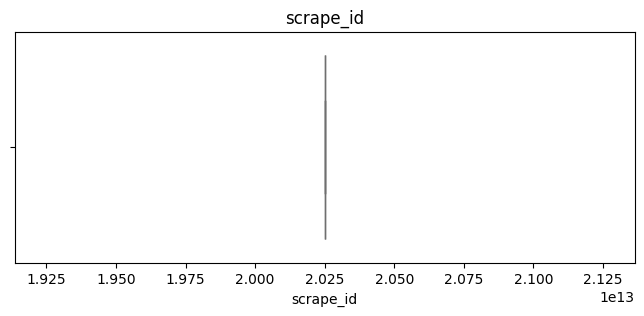

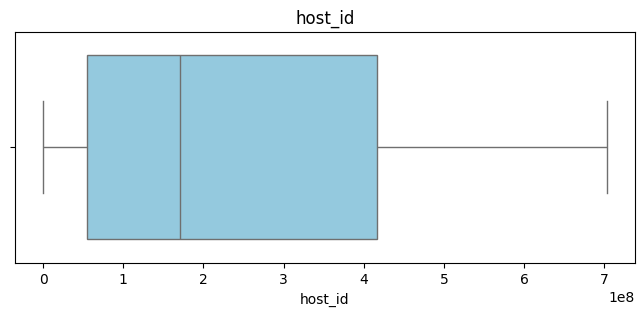

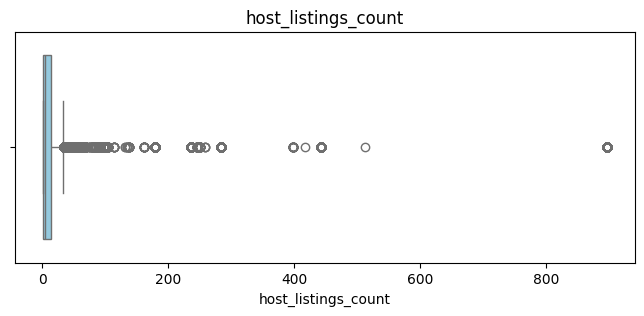

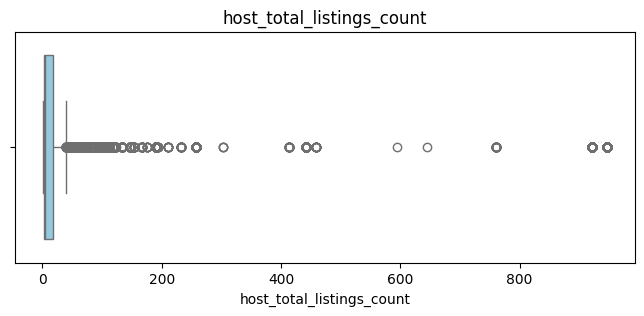

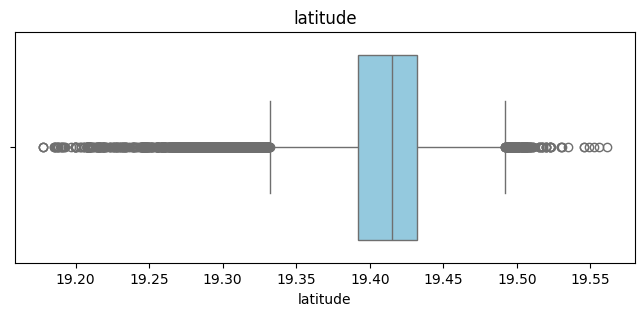

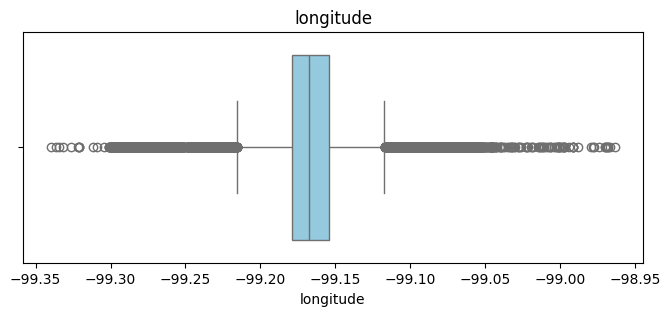

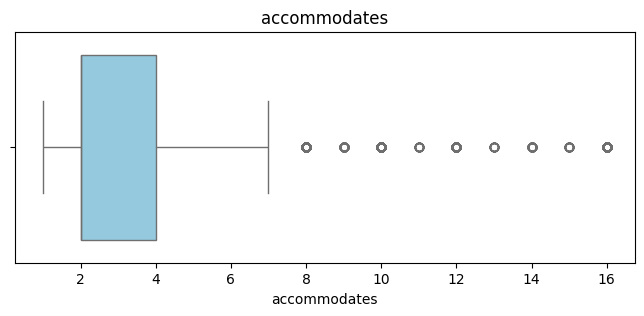

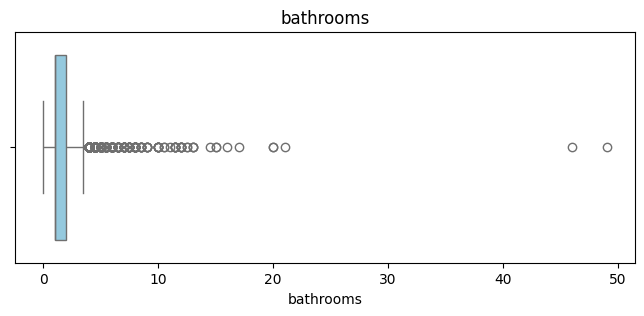

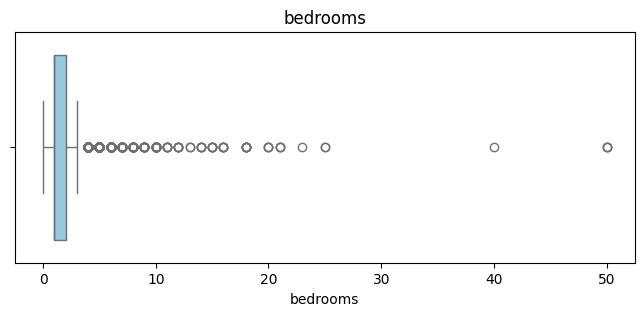

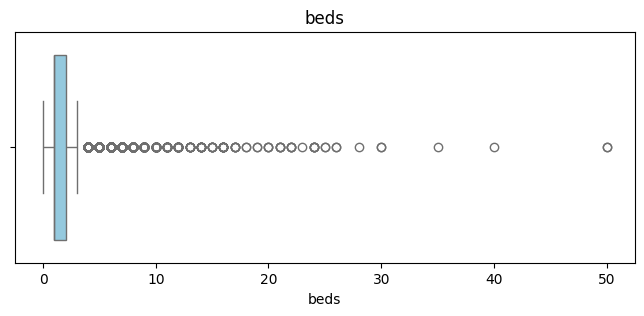

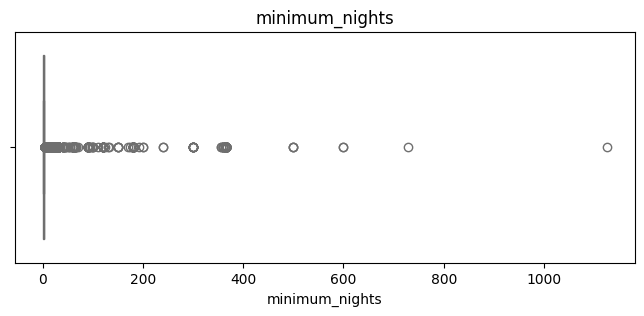

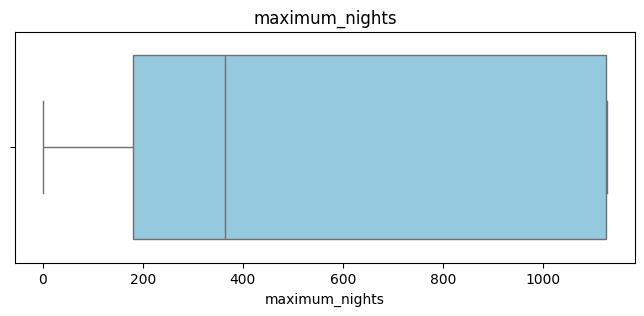

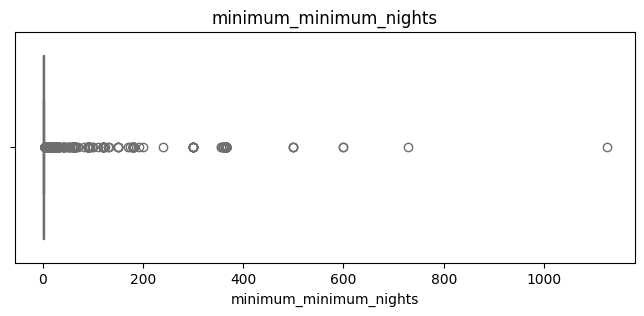

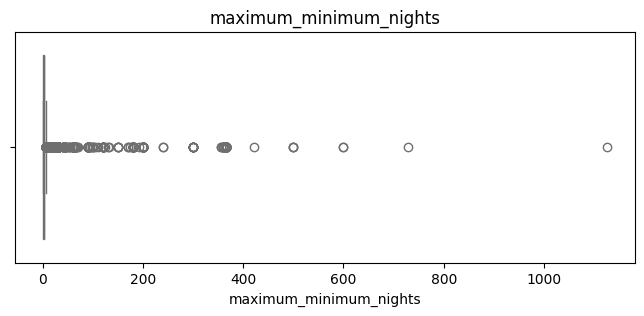

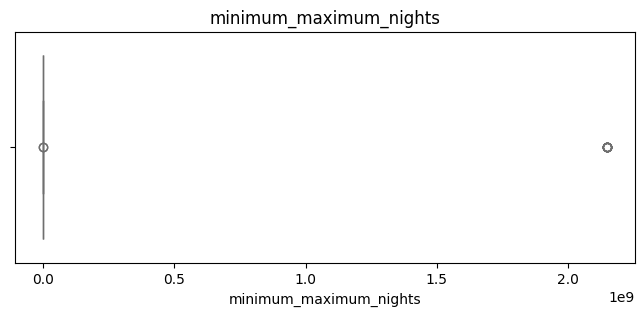

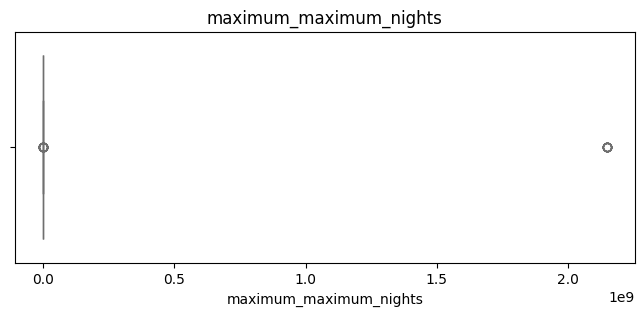

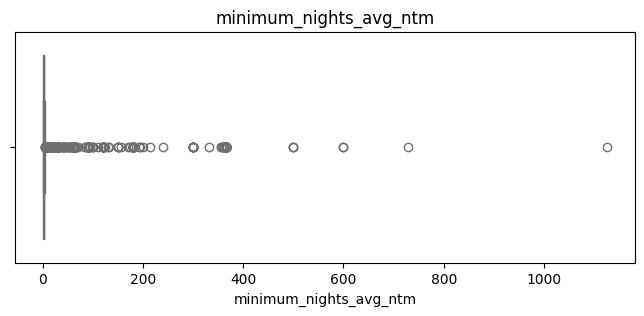

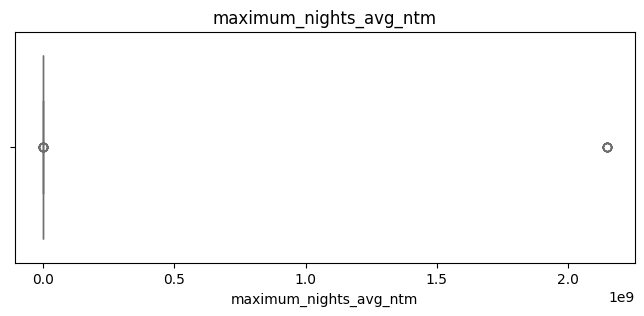

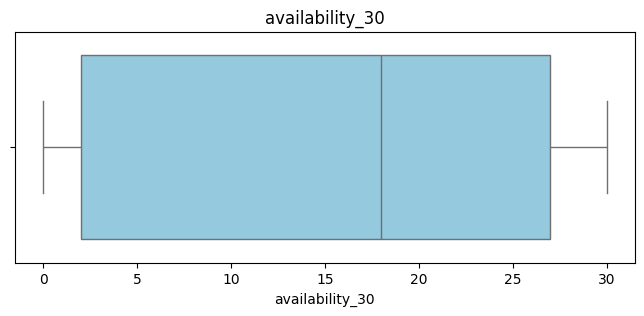

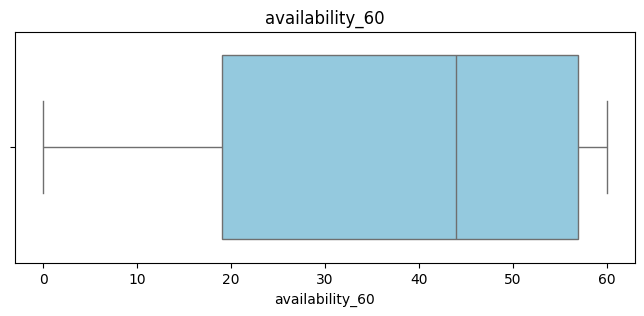

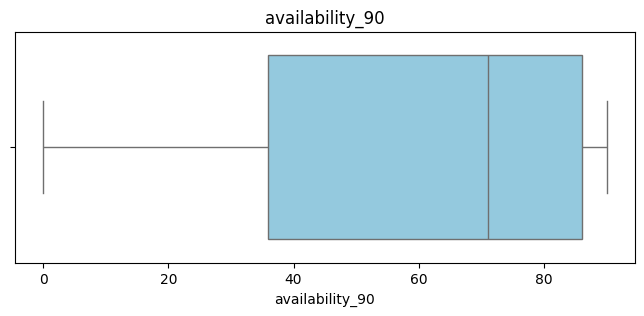

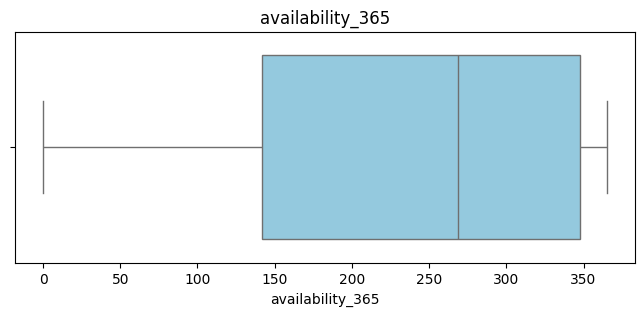

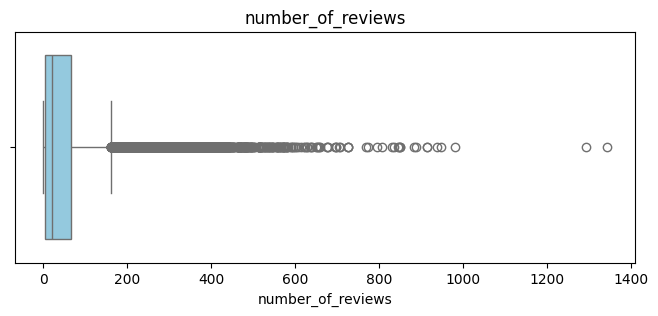

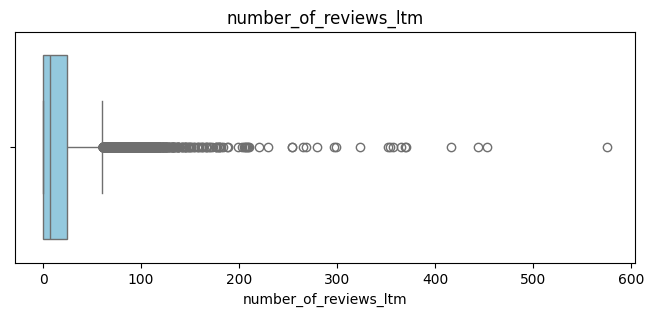

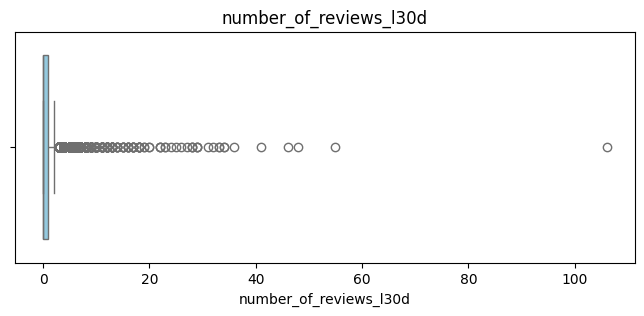

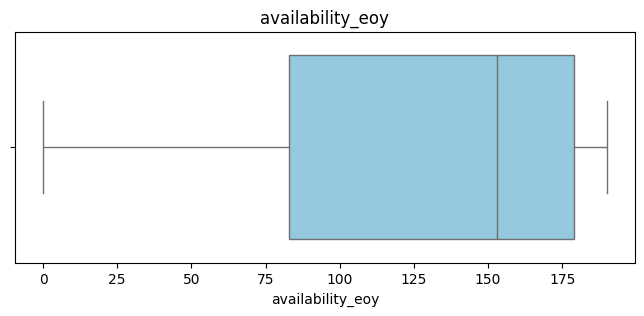

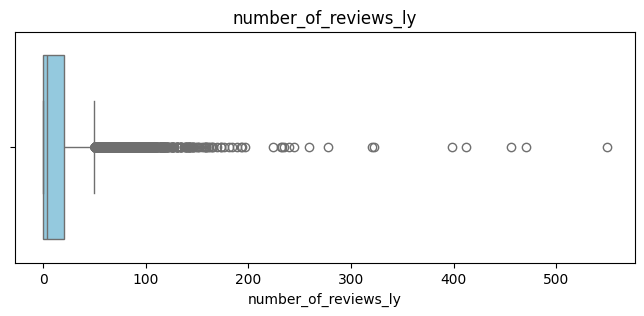

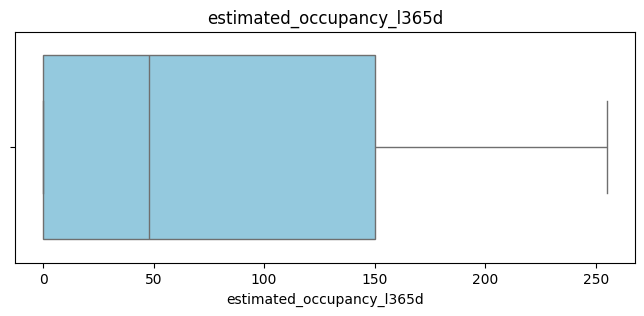

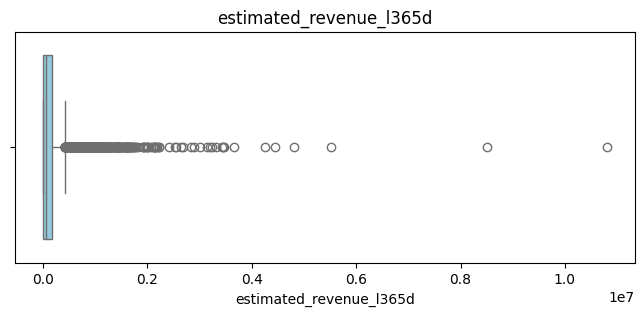

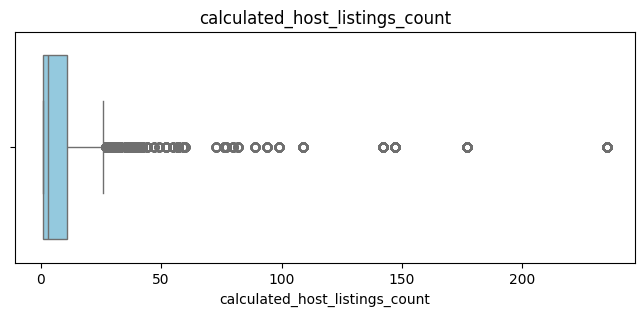

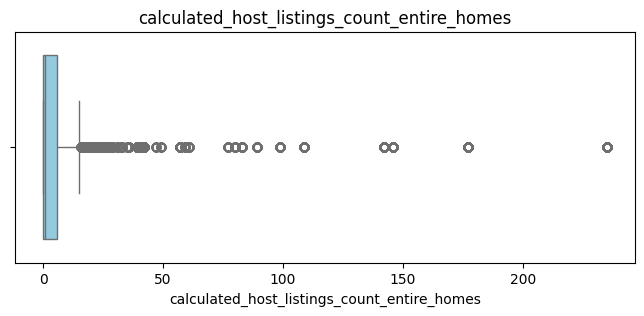

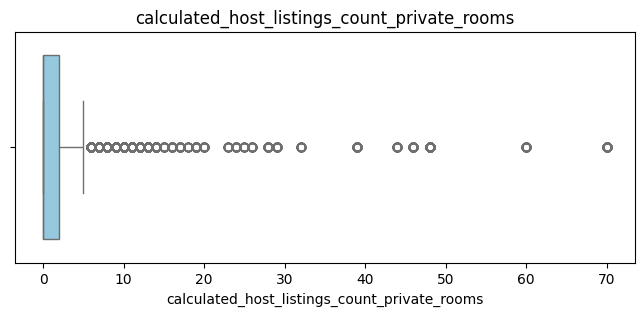

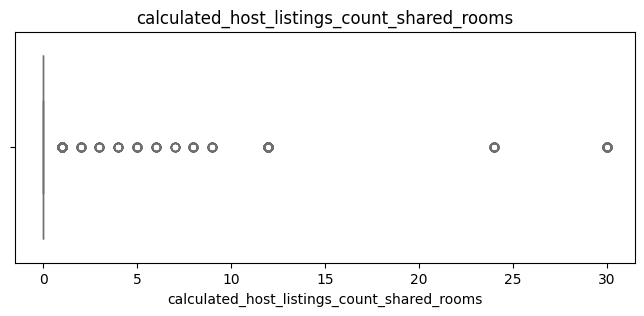

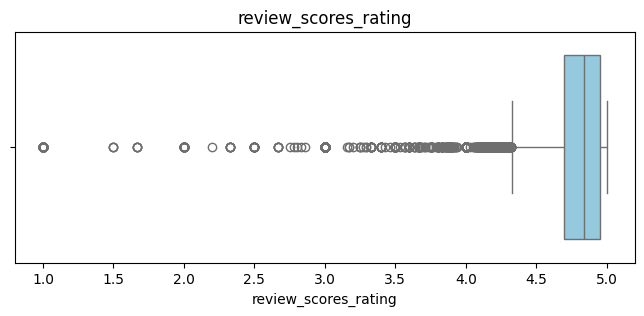

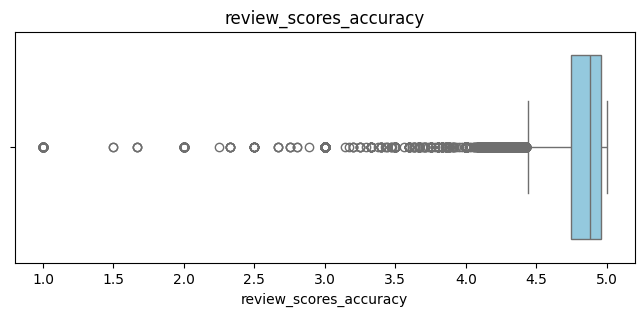

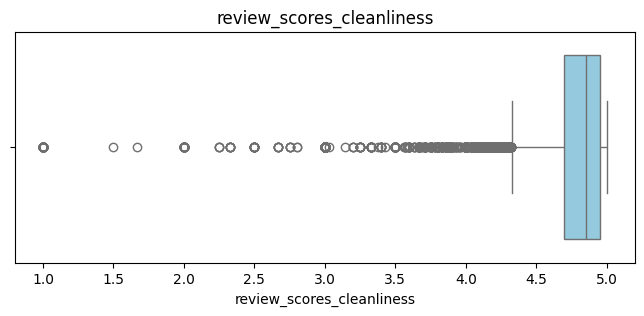

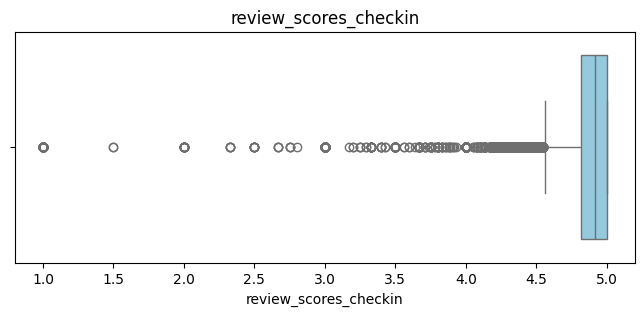

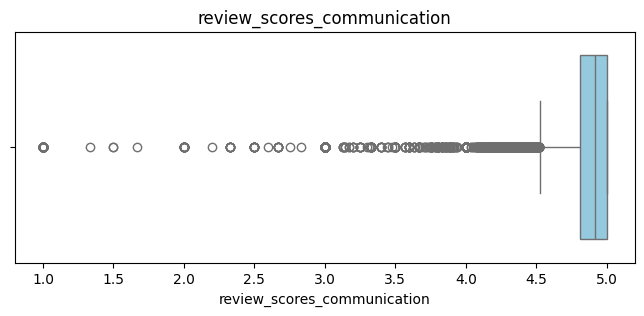

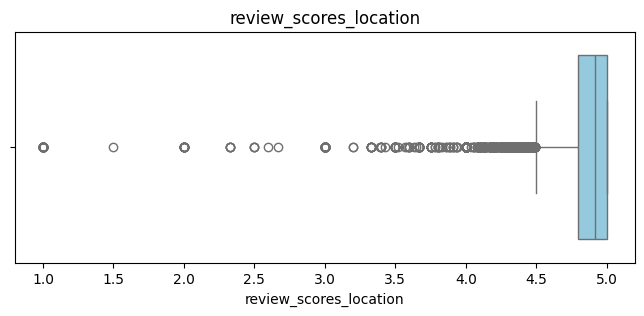

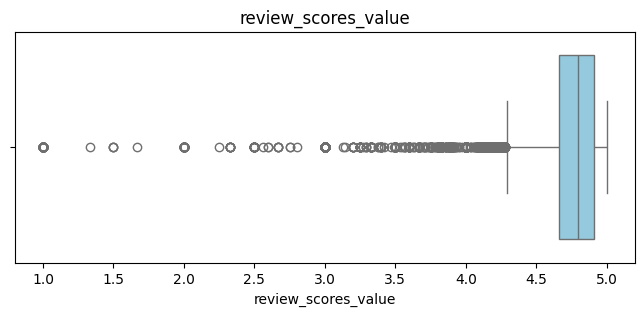

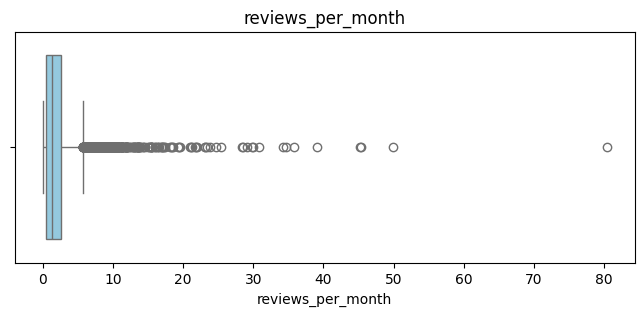

In [17]:
# Iterar por cada columna numérica
for col in df_num.columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=df_num[col], color='skyblue')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.show()

# Transformaciones del conjunto de datos

In [ ]:
#Crear una copia del DataFrame original
df_transfomraciones = df.copy()

## Eliminacion de valores duplicados

In [ ]:
#Eliminar filas duplicadas
print(f"El DataFrame tiene {df_transfomraciones.shape[0]} filas")
df_transfomraciones = df_transfomraciones.drop_duplicates()
print(f"El DataFrame tiene {df_transfomraciones.shape[0]} filas")

El DataFrame tiene 26401 filas
El DataFrame tiene 26401 filas


## Transformaciones Columnas Objects

### Eliminacion del '%' en `host_response_rate` y `host_acceptance_rate`

In [20]:
# Limpiar las columnas 'host_acceptance_rate' y 'host_response_rate'
cols_rate = ['host_acceptance_rate', 'host_response_rate']

for col in cols_rate:
    if col in df_transfomraciones.columns:
        # Eliminar el símbolo '%' y convertir a numérico
        df_transfomraciones[col] = df_transfomraciones[col].str.replace('%', '', regex=False).astype(float)       
display(df_transfomraciones[cols_rate].head())
print(df_transfomraciones[cols_rate].dtypes)


,host_acceptance_rate,host_response_rate
0,NaN,NaN
1,91.0,100.0
2,100.0,100.0
3,47.0,100.0
4,85.0,100.0


host_acceptance_rate    float64
host_response_rate      float64
dtype: object


### Categorizacion de `host_response_time`

In [ ]:
# Mapeo de categorías de tiempo de respuesta
response_time_map = {
    'within an hour': 'Fast',
    'within a few hours': 'Fast',
    'within a day': 'Moderate',
    'a few days or more': 'Slow'
}

# Aplicar la transformación
df_transfomraciones['host_response_category'] = df_transfomraciones['host_response_time'].map(response_time_map)
df_transfomraciones = df_transfomraciones.drop(columns=['host_response_time'])


In [22]:
df_transfomraciones['host_response_category'].unique()

array([nan, 'Fast', 'Slow', 'Moderate'], dtype=object)

### Columnas Binarias `host_verifications`

In [23]:
# Convertir el texto de lista a lista real (si viene como string)
df_transfomraciones['host_verifications'] = df_transfomraciones['host_verifications'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else x
)

# Reemplazar valores nulos por listas vacías
df_transfomraciones['host_verifications'] = df_transfomraciones['host_verifications'].apply(lambda x: x if isinstance(x, list) else [])

# Crear columnas binarias
df_verifications = df_transfomraciones['host_verifications'].apply(lambda x: pd.Series(1, index=x)).fillna(0).astype(int)

# Renombrar columnas (opcional): prefijo "verif_"
df_verifications.columns = [f"verif_{col}" for col in df_verifications.columns]

# Unir al dataframe original
df_transfomraciones = pd.concat([df, df_verifications], axis=1)

df_transfomraciones = df_transfomraciones.drop(columns=['host_verifications'])
# Verificar resultado
display(df_transfomraciones.head())

,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_neighbourhood,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,verif_email,verif_phone,verif_work_email
0,68e868bb1d1fc3fd4a01f6cb,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,False,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,1.0,1.0,True,True,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"['Kitchen', 'Resort access', 'Hot water', 'Cou...","$3,799.00",1,7,1.0,1.0,7.0,7.0,1.0,7.0,True,29,59,89,364,2025-06-26,0,0,0,188,0,0,0.0,False,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1,68e868bb1d1fc3fd4a01f6cc,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,100%,91%,False,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,13.0,13.0,True,True,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"['Free street parking', 'Free parking on premi...","$18,000.00",1,180,1.0,1.0,180.0,180.0,1.0,180.0,True,29,59,89,360,2025-07-01,65,1,0,179,0,6,108000.0,False,9,4,2,0,Condesa,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.39,1,1,1
2,68e868bb1d1fc3fd4a01f6cd,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,100%,100%,False,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,1.0,5.0,True,True,"Mexico City, DF, Mexico",Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"['Dining table', 'Hot water', 'Hangers', 'Esse...",$585.00,15,250,15.0,15.0,250.0,250.0,15.0,250.0,True,3,33,63,338,2025-07-01,84,1,0,157,0,30,17550.0,False,1,1,0,0,San Rafael,2011-04-02,2025-02-27,4.87,4.95,4.88,4.

### Eliminacion del '$' en `price`

In [24]:
# Limpiar la columna 'price'
if 'price' in df_transfomraciones.columns:
    df_transfomraciones['price'] = (
        df_transfomraciones['price']
        .astype(str)                        
        .str.replace('$', '', regex=False)  
        .str.replace(',', '', regex=False)  
        .str.replace('.', '', regex=False)
        .astype(float)                      
    )

display(df_transfomraciones[['price']].head())

,price
0,379900.0
1,1800000.0
2,58500.0
3,169600.0
4,100400.0


### Boxplots para `price`
En este espacio realizamos el analisis ya que antes era una columan tipo objects y con la transformacion ya es de tipo float

Durante el análisis de valores atípicos se identificaron registros que, aunque extremos, **podían considerarse naturales dentro de la lógica del negocio**, especialmente en el caso de **listings de lujo** con características o precios superiores a la media; estos casos reflejan propiedades excepcionales y se mantuvieron en el conjunto de datos.  

Sin embargo, también se detectaron valores **claramente exagerados o poco creíbles**, como precios **ridículamente altos** que no se corresponden con la realidad del mercado; dichos registros fueron **eliminados**, ya que podrían distorsionar los análisis estadísticos y afectar la interpretación de tendencias y patrones generales.  


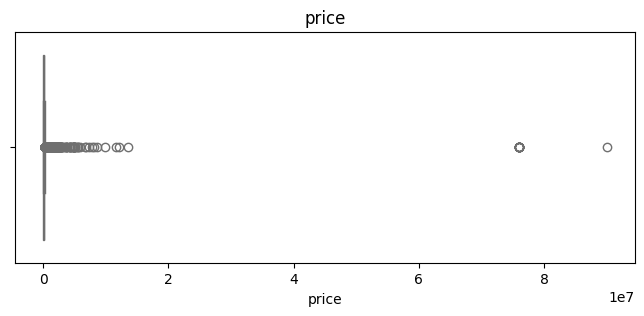

In [25]:
plt.figure(figsize=(8, 3))
sns.boxplot(x=df_transfomraciones['price'], color='skyblue')
plt.title(f'price')
plt.show()

In [ ]:
# Eliminar outliers en 'price' 
print(f"El DataFrame tiene {df_transfomraciones.count()} columnas")
df_transfomraciones = df_transfomraciones[df_transfomraciones['price'] < 400000000]
print(f"El DataFrame tiene {df_transfomraciones.count()} post - eliminacion")

El DataFrame tiene _id                    26401
id                     26401
listing_url            26401
scrape_id              26401
last_scraped           26401
                       ...  
review_scores_value    23026
reviews_per_month      23028
verif_email            26401
verif_phone            26401
verif_work_email       26401
Length: 79, dtype: int64 columnas
El DataFrame tiene _id                    23127
id                     23127
listing_url            23127
scrape_id              23127
last_scraped           23127
                       ...  
review_scores_value    20610
reviews_per_month      20612
verif_email            23127
verif_phone            23127
verif_work_email       23127
Length: 79, dtype: int64 post - eliminacion


### Limpieza de texto en `neighbourhood`

In [27]:
def normalize_text(text):
    if pd.isnull(text):
        return text
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar acentos y tildes
    text = unicodedata.normalize('NFKD', text).encode('ascii', errors='ignore').decode('utf-8')
    # Eliminar espacios extra
    return text.strip()

# Aplicar la normalización
df_transfomraciones['neighbourhood'] = df_transfomraciones['neighbourhood'].apply(normalize_text)

# (Opcional) Verificar resultados únicos
print(df_transfomraciones['neighbourhood'].unique()[:10])

['mexico city, d.f., mexico' nan 'mexico city, df, mexico'
 'mexico city, federal district, mexico'
 'colonia juarez, ciudad de mexico, mexico' 'mexico city, mexico'
 'mexico , cuauhtemoc, mexico'
 'pensador mexicano, ciudad de mexico, mexico' 'mexico, d.f., mexico'
 'col. anahuac i, miguel hidalgo , distrito federal, mexico']


### Normalizacion columna de `bathrooms`

In [28]:
df_transfomraciones['bathrooms'] = np.ceil(df_transfomraciones['bathrooms']).astype('Int64')
df_transfomraciones['bathrooms'].unique()

<IntegerArray>
[1, 6, 5, 2, 4, 3, 46, 10, 0, 7, 20, 16, 49, 9, 8, 12, 15, 13, 17, <NA>, 11,
 21]
Length: 22, dtype: Int64

### Categorizar amenities

In [ ]:
# Asegurar que la columna amenities sea tipo string
df_transfomraciones['amenities'] = df_transfomraciones['amenities'].astype(str)

# Dividir los amenities en listas
df_transfomraciones['amenities_list'] = df_transfomraciones['amenities'].str.split(',')

# Contar la frecuencia de cada amenity
all_amenities = df_transfomraciones['amenities_list'].explode()
top_10_amenities = [amen.strip() for amen, _ in Counter(all_amenities).most_common(10)]

# Crear columnas binarias para los 10 amenities más comunes
for amen in top_10_amenities:
    col_name = f"amen_{amen.replace(' ', '_').lower()}"
    df_transfomraciones[col_name] = df_transfomraciones['amenities_list'].apply(lambda x: int(amen in [a.strip() for a in x]))

# Crear columna con el número total de amenities
df_transfomraciones['amenities_count'] = df_transfomraciones['amenities_list'].apply(lambda x: len(x))


In [41]:
df_transfomraciones.head()

,_id,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,verif_email,verif_phone,verif_work_email,amenities_list,amen_'wifi',amen_'kitchen',amen_'hot_water',amen_'hangers',amen_'dishes_and_silverware',amen_'cooking_basics',amen_'iron',amen_'essentials',amen_'bed_linens',amen_'dedicated_workspace',amenities_count
0,68e868bb1d1fc3fd4a01f6cb,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,False,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,1.0,1.0,True,True,Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1,1 bath,1.0,1.0,"'Kitchen', 'Resort access', 'Hot water', 'Cour...",379900.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,True,29,59,89,364,2025-06-26,0,0,0,188,0,0,0.0,False,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,"['Kitchen', 'Resort access', 'Hot water', '...",1,1,1,0,0,0,0,0,1,0,12
1,68e868bb1d1fc3fd4a01f6cc,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,100%,91%,False,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,13.0,13.0,True,True,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,6,5.5 baths,5.0,8.0,"'Free street parking', 'Free parking on premis...",1800000.0,1,180,1.0,1.0,180.0,180.0,1.0,180.0,True,29,59,89,360,2025-07-01,65,1,0,179,0,6,108000.0,False,9,4,2,0,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.39,1,1,1,"['Free street parking', 'Free parking on prem...",1,1,0,1,1,1,1,1,0,0,26
2,68e868bb1d1fc3fd4a01f6cd,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,100%,100%,False,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,1.0,5.0,True,True,Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,2,1,1 bath,1.0,1.0,"'Dining table', 'Hot water', 'Hangers', 'Essen...",58500.0,15,250,15.0,15.0,250.0,250.0,15.0,250

## Eliminacion de Columnas Por Nulos

In [29]:
#Eliminamos columnas
print(f"El DataFrame tiene {df_transfomraciones.shape[1]} columnas")
df_transfomraciones = df_transfomraciones.drop(columns=['host_neighbourhood', 'neighborhood_overview', 'neighbourhood'])
print(f"El DataFrame tiene {df_transfomraciones.shape[1]} columnas post eliminacion")

El DataFrame tiene 79 columnas
El DataFrame tiene 76 columnas post eliminacion


### Eliminacion de registros con valores atipicos

In [30]:
cols_outliers = ['bathrooms', 'bedrooms', 'beds']
# Mostrar cuántos registros serán eliminados
filtro = (df_transfomraciones[cols_outliers] > 15).any(axis=1)
print(f"Filas a eliminar por valores > 15: {filtro.sum()}")

# Eliminar las filas
df_transfomraciones = df_transfomraciones[~filtro].copy()
print(f"DataFrame final: {df_transfomraciones.shape[0]} filas y {df_transfomraciones.shape[1]} columnas")

Filas a eliminar por valores > 15: 53
DataFrame final: 23074 filas y 76 columnas


# DataFrame Final

In [31]:
# Mostramos todas las columnas sin truncar
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
df_transfomraciones.head(5)

,_id,id,listing_url,scrape_id,last_scraped,source,name,description,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,verif_email,verif_phone,verif_work_email
0,68e868bb1d1fc3fd4a01f6cb,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",NaN,NaN,NaN,False,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,1.0,1.0,True,True,Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1,1 bath,1.0,1.0,"['Kitchen', 'Resort access', 'Hot water', 'Cou...",379900.0,1,7,1.0,1.0,7.0,7.0,1.0,7.0,True,29,59,89,364,2025-06-26,0,0,0,188,0,0,0.0,False,1,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1
1,68e868bb1d1fc3fd4a01f6cc,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,100%,91%,False,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,13.0,13.0,True,True,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,6,5.5 baths,5.0,8.0,"['Free street parking', 'Free parking on premi...",1800000.0,1,180,1.0,1.0,180.0,180.0,1.0,180.0,True,29,59,89,360,2025-07-01,65,1,0,179,0,6,108000.0,False,9,4,2,0,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.39,1,1,1
2,68e868bb1d1fc3fd4a01f6cd,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,100%,100%,False,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,1.0,5.0,True,True,Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,2,1,1 bath,1.0,1.0,"['Dining table', 'Hot water', 'Hangers', 'Esse...",58500.0,15,250,15.0,15.0,250.0,250.0,15.0,250.0,True,3,33,63,338,2025-07-01,84,1,0,157,0,30,17550.0,False,1,1,0,0,2011-04-02,2025-02-27,4.87,4.95,4.88,4.98,4.94,4.76,4.79,0.48,1,1,0
3,68e868bb1d1fc3fd4a01f6ce,67703,https://www.airbnb.com/rooms/67703,20250625031918,2025-07-01,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",https://a0.muscache.com/picture